[<img align="right" src="img/wall_following.png" />](http://java-player.sourceforge.net/examples-3.php)
# Wall Following

This is another popular behavior for mobile robots indoors. The robot keeps a constant distance to a lateral wall (either left or right) while moving forward and turning at corners.

In this way, the robot can explore rooms or corridors safely.

For this application, we are going to implement an algorithm developed by [Radu Bogdan Rusu](https://www.linkedin.com/in/radubogdanrusu) in his [Javaclient Player/Stage Project](http://java-player.sourceforge.net/examples-3.php).

In [1]:
import packages.initialization
import pioneer3dx as p3dx
p3dx.init()

Define two wall thresholds: the following behavior will try to keep the robot at a distance to the wall between those values.

In [2]:
MIN_WALL_THRESHOLD = 0.3
MAX_WALL_THRESHOLD = 0.4

Define the default translational and rotational speeds.

In [3]:
DEF_X_SPEED = 0.2       # default forward velocity
DEF_YAW_SPEED = 0.15    # default turning velocity

We need to control the speed of the robot with the function that computes the angular velocities of the wheels based on the linear and rotational speed of the robot. This function was introduced in the first week of the course.

In [4]:
def move(V_robot,w_robot):
    r = 0.1953 / 2
    L = 0.33
    w_r = (2 * V_robot + L * w_robot) / (2*r)
    w_l = (2 * V_robot - L * w_robot) / (2*r)
    p3dx.move(w_l, w_r)

### Reading the ultrasonic sensors

In this implementation, the robot will follow the wall at its left side.

We need to implement a function named `getSonars`, which  returns the minimum value of the left sensors (0, 1, 2) and the minimum value of the front sensors (3, 4).

As in previous exercises, you can use the built-in `min` function and array slicing.

In [5]:
def getSonars():
    leftSide = min(p3dx.distance[0:3])
    frontSide = min(p3dx.distance[3:5])
    return leftSide, frontSide

Before going on with more code, we suggest to make a simple test for the function:

In [6]:
print(p3dx.distance)
getSonars()

[4.461711883544922, 7.524592399597168, 5.202354431152344, 1.9878172874450684, 1.629717230796814, 1.5170981884002686, 0.9987303614616394, 0.38519445061683655]


(4.461711883544922, 1.629717230796814)

No syntax errors? Does it produce the good results? If not, you may edit the function and try again. When eveything works, please proceed with the next code.

### Getting close to the wall

Initially, the robot can be in the middle of the room. Before the wall following behavior is triggered, we need to make sure that the robot is properly located. We will implement a function named `getWall`, which will work in two steps:

    1. The robot goes forward until a wall is detected in front of it
    2. The robot turns right until it reads a value in sonar 0 smaller than a given threshold
        1. if the front distance is smaller than the left distance 
           turn the robot at x3 speed
        2. otherwise turn at default speed

In [7]:
def getWall():
    leftSide, frontSide = getSonars()
    # move forward until an obstacle is detected at the front
    while frontSide > MIN_WALL_THRESHOLD:       
        move(DEF_X_SPEED,0)
        leftSide, frontSide = getSonars()
        
    # turn until the wall is detected by sonar 0
    while leftSide > MIN_WALL_THRESHOLD:
        if frontSide < leftSide:
            yawSpeed = -DEF_YAW_SPEED * 3
        else:
            yawSpeed = DEF_YAW_SPEED # !!! check sign
        move(0,yawSpeed)
        leftSide, frontSide = getSonars()
    move(0,0)

Again, let's test the function:

In [12]:
try:
    getWall()
except KeyboardInterrupt:
    move(0,0)

### Main loop

Finally, we implement the main loop of Rusu's algorithm:

    1. Go ahead and find a wall and align to it on the robot's left side
    2. Repeat forever
       1. by default, just move forward
       2. if we're getting too close to the wall with the front side
          go backward and turn right quickly (x4)
       3. if we're getting too close to the wall with the left side
          move forward slowly (x0.5) and turn right
       4. if we're getting too far away from the wall with the left side
          move forward slowly (x0.5) and turn left

In [8]:
try:
    getWall()
    while True:
        leftSide, frontSide = getSonars()
        # by default, just move forward
        xSpeed = DEF_X_SPEED
        yawSpeed = DEF_YAW_SPEED
        # if we're getting too close to the wall with the front side...
        if frontSide < MAX_WALL_THRESHOLD:
            # go backward and turn right quickly (x4)
            xSpeed = -0.1
            yawSpeed = -DEF_YAW_SPEED * 4 # !!! check sign
        else:
            # if we're getting too close to the wall with the left side...
            if leftSide < MIN_WALL_THRESHOLD:
                # move slowly forward (x0.5) and turn right
                xSpeed  = DEF_X_SPEED * 0.5
                yawSpeed = -DEF_YAW_SPEED # !!! check sign
            else:
                # if we're getting too far away from the wall with the left side...
                if leftSide > MIN_WALL_THRESHOLD:
                    # move slowly forward (x0.5) and turn left
                    xSpeed  = DEF_X_SPEED * 0.5
                    yawSpeed = DEF_YAW_SPEED # !!! check sign
        # Move the robot
        move(xSpeed,yawSpeed)
except KeyboardInterrupt:
    move(0,0)

The resulting trajectory of the robot can be plotted.

In [9]:
%matplotlib inline
import trajectory

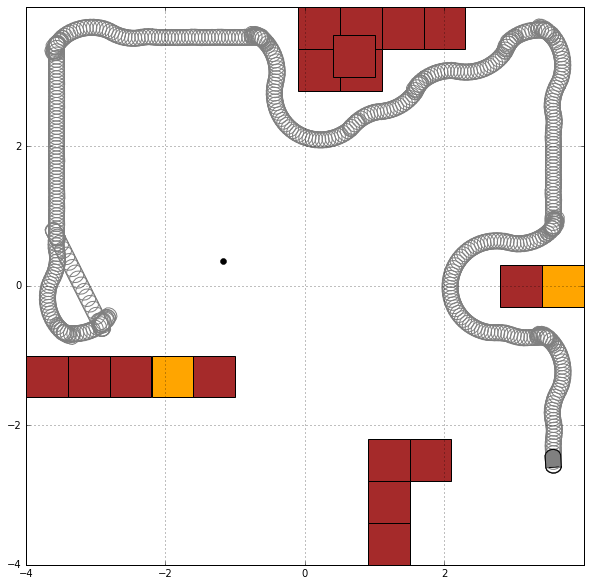

In [10]:
trajectory.plot()

Did it work? If so, congratulations, you have completed the work of this week!